In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [ ]:
# Загружаем данные, смотрим на них
# данные в репозитории, с домашкой

data = pd.read_csv('/content/bank-additional-balanced.csv')
data.head()

,Unnamed: 0,age,job,marital,education,default,housing,loan,contact,month,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,0,56,services,married,high.school,no,no,yes,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,1,59,admin.,married,professional.course,no,no,no,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,2,57,housemaid,divorced,basic.4y,no,yes,no,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,3,41,technician,single,high.school,no,yes,no,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,4,58,management,unknown,university.degree,no,yes,no,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [ ]:
# Так как огромное количество данных - это строки, которые подать в алгоритм мы не сможем, необходимо поменять их на числа
# Преобразование категориальных признаков в числовые с использованием One-Hot Encoding
data = pd.get_dummies(data, columns=['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome'])
# Преобразование целевой переменной в числовой формат
data['y'] = ...

In [ ]:
# Определение остальных категориальных признаков
categorical_features = data.select_dtypes(include=['object']).columns.tolist()

# Удаление категориальных признаков (если их не слишком много)
...

In [ ]:
# Разделение данных на обучающий и тестовый наборы
...

In [ ]:
# Обучение модели логистической регрессии с использованием GridSearchCV
parameters = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}
logreg = LogisticRegression(solver='liblinear')
grid_search = ...
grid_search.fit(...)

# Вывод лучших параметров
print("Лучшие параметры:", ...)

Когда алгоритм оптимизации, например, lbfgs, не сходится к оптимальному решению, переключение на liblinear иногда может помочь, так как алгоритмы различаются в своих подходах к оптимизации.

In [ ]:
# Нам необходимо написать функции для метрик
import numpy as np

def calculate_precision(y_true, y_pred):
    true_positives = ...
    predicted_positives = np.sum(y_pred == 1)
    if predicted_positives == 0:
        return 0
    return ... / predicted_positives

def calculate_recall(y_true, y_pred):
    true_positives = ...
    actual_positives = np.sum(y_true == 1)
    if actual_positives == 0:
        return 0
    return ... / actual_positives

def calculate_accuracy(y_true, y_pred):
    correct_predictions = ...
    total_samples = len(y_true)
    return ... / ...

In [ ]:
# Получение предсказаний с лучшими параметрами
best_params = ...
logreg_best = LogisticRegression(C=best_params['C'], solver='liblinear')
logreg_best.fit(...)
y_pred_best = ...

In [ ]:
# Вычисление метрик
accuracy_best = ...
precision_best = ...
recall_best = ...

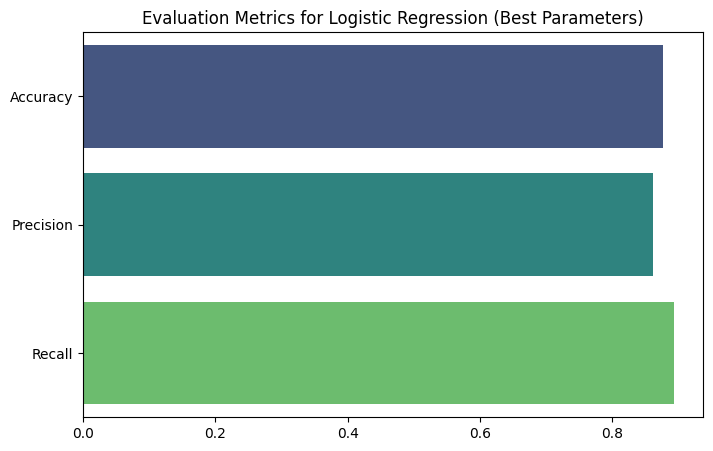

In [ ]:
def plot_metrics(accuracy, precision, recall, model_name):
    labels = ['Accuracy', 'Precision', 'Recall']
    values = [..., ..., ...]

    plt.figure(figsize=(8, 5))
    sns.barplot(..., ..., palette='viridis')
    plt.title(f"Evaluation Metrics for {model_name}")
    plt.show()

# Визуализация метрик для лучших параметров
plot_metrics(accuracy_best, precision_best, recall_best, "Logistic Regression (Best Parameters)")

Давайте узнаем точные данные

In [ ]:
print("Metrics for Logistic Regression with Best Parameters:")
...

Metrics for Logistic Regression with Best Parameters:
Accuracy: 0.8766163793103449
Precision: 0.8619599578503688
Recall: 0.8930131004366813


Сделайте фунцию, отображающую Confusion matrix модели, сравните ответ с реализацией из sklearn

In [ ]:
from sklearn.metrics import confusion_matrix

def custom_confusion_matrix(y_pred, y_real):
    ...

<h1><bold>ПРОДВИНУТАЯ ЧАСТЬ<bold></h1>

Помимо метрик recall, accuracy и precision Вам необходимо будет сравнить еще и Roc-Auc

Если неудобно пользоваться шаблоном, можно писать по-своему. Эффективность здесь не имее значения


In [ ]:
def calculate_roc_auc_custom(y_true, y_pred_prob, num_thresholds=100):
    thresholds = np.linspace(0, 1, num_thresholds)
    tpr_values = []
    fpr_values = []

    total_positive = ...
    total_negative = ...

    for threshold in thresholds:
        y_pred_labels = (y_pred_prob >= threshold).astype(int)

        tp_count = np.sum((...) & (...))
        fp_count = np.sum((y_true == 0) & (y_pred_labels == 1))

        tpr = tp_count / ...
        fpr = ... / total_negative

        tpr_values.append(...)
        fpr_values.append(...)

    # Площадь под ROC-кривой (AUC) с использованием метода трапеции
    roc_auc = np.abs(np.trapz(tpr_values, fpr_values))
    return roc_auc


In [ ]:
# Сброс индексов для X_test и y_test
X_test_reset_index = X_test.reset_index(drop=True)
y_test_reset_index = y_test.reset_index(drop=True)

# Получение вероятностей для модели
y_pred_prob_best = logreg_best.predict_proba(X_test_reset_index)[:, 1]

# Получение вероятностей для первой модели
y_pred_prob1 = ...

# Получение вероятностей для второй модели
y_pred_prob2 = ...

# Обновление индексов для вероятностей
y_pred_prob_best_df = pd.Series(y_pred_prob_best, index=y_test_reset_index.index)
y_pred_prob1_df = ...
y_pred_prob2_df = ...


# Рассчитываем ROC AUC для каждой модели
roc_auc_best = ...

print("Custom ROC AUC for Best Model (Grid Search):", roc_auc_best)

Custom ROC AUC for Best Model (Grid Search): 0.9402135789278083
Custom ROC AUC for Blended Model: 0.9395858496701662


In [ ]:
def plot_roc_curve(y_true, y_pred_prob1, y_pred_prob2, label1='Model 1', label2='Model 2', num_thresholds=100):
    # Генерация порогов для ROC-кривой
    thresholds = np.linspace(0, 1, num_thresholds)
    # Инициализация списков для сохранения значений True Positive Rate (TPR) и False Positive Rate (FPR)
    tpr_values1 = []
    fpr_values1 = []
    tpr_values2 = []
    fpr_values2 = []

    # Вычисление общего количества положительных и отрицательных случаев
    total_positive = ...
    total_negative = ...

    # Рассчитываем TPR и FPR для каждого порога
    for threshold in thresholds:
        # Применение порога к предсказанным вероятностям для получения меток классов
        y_pred_labels1 = (y_pred_prob1 >= threshold).astype(int)
        y_pred_labels2 = (y_pred_prob2 >= threshold).astype(int)

        # Вычисление TP и FP для каждой модели
        tp_count1 = ...
        fp_count1 = ...
        tp_count2 = ...
        fp_count2 = ...

        # Вычисление TPR и FPR для каждой модели
        tpr1 = tp_count1 / total_positive
        fpr1 = fp_count1 / total_negative
        tpr2 = tp_count2 / total_positive
        fpr2 = fp_count2 / total_negative

        # Сохранение значений TPR и FPR в списки
        tpr_values1.append(...)
        fpr_values1.append(...)
        tpr_values2.append(...)
        fpr_values2.append(fpr2)

    # Вычисление площади под ROC-кривой (AUC) с использованием метода трапеции
    roc_auc1 = np.abs(np.trapz(tpr_values1, fpr_values1))
    roc_auc2 = np.abs(np.trapz(tpr_values2, fpr_values2))

    # Построение ROC-кривых

    plt.figure(figsize=(8, 8))
    plt.plot(fpr_values1, tpr_values1, color='blue', lw=2, label=f'{label1} (AUC = {roc_auc1:.5f})')
    plt.plot(..., ..., color='red', lw=2, label=f'{label2} (AUC = {roc_auc2:.5f})')
    plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--', label='Random')
    plt.title('ROC Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    plt.show()

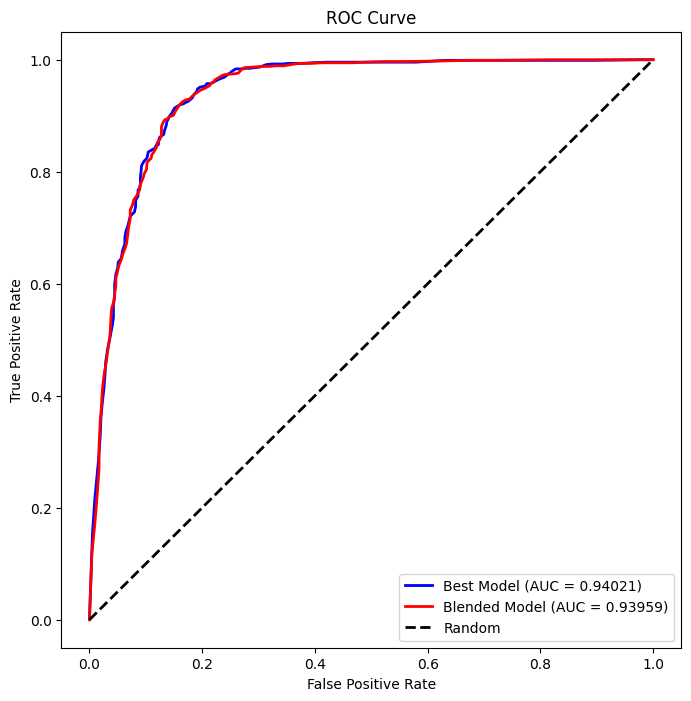

In [ ]:
plot_roc_curve(y_test_reset_index, ..., y_pred_prob_blend, label1='Best Model', label2='Blended Model')